In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
dataset=pd.read_csv("filtered_app_incident_updated.csv")

In [3]:
dataset

,app_name,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
0,NIP,22,61,32,42,52,12000,1,1
1,NIP,18,89,28,38,48,8000,1,1
2,NIP,14,61,24,34,44,4000,1,1
3,NIP,10,90,20,30,40,0,1,1
4,NIP,14,87,24,34,44,4000,1,1
...,...,...,...,...,...,...,...,...,...
1543,NIP,20,28,30,40,50,10000,0,0
1544,NIP,21,50,31,41,51,11000,0,0
1545,NIP,22,33,32,42,52,12000,0,0
1546,NIP,21,11,31,41,51,11000,0,0


## Finding null values and replacing them

In [4]:
dataset.isnull().sum()

app_name             0
response_time        0
error_rate           0
cpu_usage            0
memory_usage         0
disk_space           0
active_users         0
incident_duration    0
downtime             0
dtype: int64

## Finding the information about the dataset (dtype) object or integer that column contains

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1548 entries, 0 to 1547
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   app_name           1548 non-null   object
 1   response_time      1548 non-null   int64 
 2   error_rate         1548 non-null   int64 
 3   cpu_usage          1548 non-null   int64 
 4   memory_usage       1548 non-null   int64 
 5   disk_space         1548 non-null   int64 
 6   active_users       1548 non-null   int64 
 7   incident_duration  1548 non-null   int64 
 8   downtime           1548 non-null   int64 
dtypes: int64(8), object(1)
memory usage: 109.0+ KB


## Dataset shape for downtime and incident_duration

In [6]:
dataset['downtime'].value_counts()

downtime
0    1000
1     548
Name: count, dtype: int64

In [7]:
dataset['incident_duration'].value_counts()

incident_duration
0    1000
1     548
Name: count, dtype: int64

## Downsampling the dataset to balance the dataset

In [8]:
from sklearn.utils import resample
import pandas as pd

# Load the dataset
data = pd.read_csv('filtered_app_incident_updated.csv')  # Replace with your file path

# Separate the dataset into two groups based on the 'downtime' column
majority_class = data[data['downtime'] == 0]
minority_class = data[data['downtime'] == 1]

# Downsample the majority class to match the size of the minority class
majority_downsampled = resample(majority_class, 
                                replace=False,  # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # for reproducibility

# Combine the downsampled majority class with the minority class
balanced_data = pd.concat([majority_downsampled, minority_class])

# Shuffle the resulting dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

# Save the balanced dataset
balanced_data.to_csv('balanced_dataset.csv', index=False)  # Replace with your desired file path

## After downsampling checking for shape of dataset

In [9]:
balanced_data['downtime'].value_counts()

downtime
0    548
1    548
Name: count, dtype: int64

## seperating the quan and qual

In [10]:
def quanQual(balanced_data):
    quan=[]
    qual=[]
    for columnName in balanced_data.columns:
        print(columnName)
        if(balanced_data[columnName].dtype=='object'):
            print("qual")
            qual.append(columnName)
        else:
            print("quan")
            quan.append(columnName)
    return quan,qual

In [11]:
quan,qual=quanQual(balanced_data)

app_name
qual
response_time
quan
error_rate
quan
cpu_usage
quan
memory_usage
quan
disk_space
quan
active_users
quan
incident_duration
quan
downtime
quan


In [12]:
quan

['response_time',
 'error_rate',
 'cpu_usage',
 'memory_usage',
 'disk_space',
 'active_users',
 'incident_duration',
 'downtime']

In [13]:
qual

['app_name']

## Basic information of dataset by Dataframe to view

In [14]:
balanced_data.describe()

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
count,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,16.076642,51.979015,26.076642,36.076642,46.076642,6076.642336,0.500000,0.500000
std,3.676106,28.945272,3.676106,3.676106,3.676106,3676.105996,0.500228,0.500228
min,10.000000,1.000000,20.000000,30.000000,40.000000,0.000000,0.000000,0.000000
25%,14.000000,27.000000,24.000000,34.000000,44.000000,4000.000000,0.000000,0.000000
50%,16.000000,53.000000,26.000000,36.000000,46.000000,6000.000000,0.500000,0.500000
75%,18.000000,77.250000,28.000000,38.000000,48.000000,8000.000000,1.000000,1.000000
max,22.000000,100.000000,32.000000,42.000000,52.000000,12000.000000,1.000000,1.000000


## Additionally added some univariate informations like quatertaile, 1.5 rule, min, max, greater, lesser

In [15]:
descriptive=pd.DataFrame(index=["mean","median","mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%",
                               "IQR","1.5rule","Lesser","Greater","Min","Max"],columns=quan)
for columnName in quan:
    descriptive[columnName]["mean"]=balanced_data[columnName].mean()
    descriptive[columnName]["median"]=balanced_data[columnName].median()
    descriptive[columnName]["mode"]=balanced_data[columnName].mode()[0]
    descriptive[columnName]["Q1:25%"]=balanced_data.describe()[columnName]["25%"]
    descriptive[columnName]["Q2:50%"]=balanced_data.describe()[columnName]["50%"]
    descriptive[columnName]["Q3:75%"]=balanced_data.describe()[columnName]["75%"]
    descriptive[columnName]["Q4:100%"]=balanced_data.describe()[columnName]["max"]
    descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
    descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
    descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
    descriptive[columnName]["Min"]=balanced_data[columnName].min()
    descriptive[columnName]["Max"]=balanced_data[columnName].max()
    

C:\Users\91934\AppData\Local\Temp\ipykernel_26680\2156245111.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["mean"]=balanced_data[columnName].mean()
C:\Users\91934\AppData\Local\Temp\ipykernel_26680\2156245111.py

In [29]:
descriptive

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
mean,16.076642,51.979015,26.076642,36.076642,46.076642,6076.642336,0.5,0.5
median,16.0,53.0,26.0,36.0,46.0,6000.0,0.5,0.5
mode,18,53,28,38,48,8000,0,0
Q1:25%,14.0,27.0,24.0,34.0,44.0,4000.0,0.0,0.0
Q2:50%,16.0,53.0,26.0,36.0,46.0,6000.0,0.5,0.5
Q3:75%,18.0,77.25,28.0,38.0,48.0,8000.0,1.0,1.0
Q4:100%,22.0,100.0,32.0,42.0,52.0,12000.0,1.0,1.0
IQR,4.0,50.25,4.0,4.0,4.0,4000.0,1.0,1.0
1.5rule,6.0,75.375,6.0,6.0,6.0,6000.0,1.5,1.5
Lesser,8.0,-48.375,18.0,28.0,38.0,-2000.0,-1.5,-1.5


## Finding outliers

In [16]:
lesser=[]
greater=[]

for columnName in quan:
    if(descriptive[columnName]["Min"]<descriptive[columnName]["Lesser"]):
        lesser.append(columnName)
    if(descriptive[columnName]["Max"]>descriptive[columnName]["Greater"]):
        greater.append(columnName)

In [17]:
print("Lesser:", lesser)
print("Greater:", greater)

Lesser: []
Greater: []


## If any outliers are formed to replacing the outliers

In [18]:
for columnName in lesser:
    dataset[columnName][balanced_data[columnName]<descriptive[columnName]["Lesser"]]=descriptive[columnName]["Lesser"]
for columnName in greater:
    dataset[columnName][balanced_data[columnName]>descriptive[columnName]["Greater"]]=descriptive[columnName]["Greater"]


In [19]:
lesser

[]

In [20]:
greater

[]

## FREQUENCY

In [21]:
freqTable=pd.DataFrame(columns=["unique_values","Frequency","Relative_frequency","Cumsum"])
freqTable

,unique_values,Frequency,Relative_frequency,Cumsum


In [22]:
def freqTable(columnName,balanced_data):
    freqTable=pd.DataFrame(columns=["unique_values","Frequency","Relative_frequency","Cumsum"])
    freqTable["unique_values"]=balanced_data[columnName].value_counts().index
    freqTable["Frequency"]=balanced_data[columnName].value_counts().values
    freqTable["Relative_frequency"]=(freqTable["Frequency"]/103)
    freqTable["Cumsum"]=freqTable["Relative_frequency"].cumsum()
    return freqTable

In [23]:
freqTable("active_users",balanced_data)

,unique_values,Frequency,Relative_frequency,Cumsum
0,8000,225,2.184466,2.184466
1,4000,222,2.155340,4.339806
2,12000,113,1.097087,5.436893
3,0,111,1.077670,6.514563
4,11000,52,0.504854,7.019417
5,9000,50,0.485437,7.504854
6,10000,50,0.485437,7.990291
7,6000,49,0.475728,8.466019
8,7000,48,0.466019,8.932039
9,1000,47,0.456311,9.388350


## Added some addition freatures 

In [24]:
def Univariate(dataset,quan):
    descriptive=pd.DataFrame(index=["mean","median","mode","Q1:25%","Q2:50%","Q3:75%","Q4:100%",
                               "IQR","1.5rule","Lesser","Greater","Min","Max","skew","kurtosis","var","Std"],columns=quan)
    for columnName in quan:
        descriptive[columnName]["mean"]=balanced_data[columnName].mean()
        descriptive[columnName]["median"]=balanced_data[columnName].median()
        descriptive[columnName]["mode"]=balanced_data[columnName].mode()[0]
        descriptive[columnName]["Q1:25%"]=balanced_data.describe()[columnName]["25%"]
        descriptive[columnName]["Q2:50%"]=balanced_data.describe()[columnName]["50%"]
        descriptive[columnName]["Q3:75%"]=balanced_data.describe()[columnName]["75%"]
        descriptive[columnName]["Q4:100%"]=balanced_data.describe()[columnName]["max"]
        descriptive[columnName]["IQR"]=descriptive[columnName]["Q3:75%"]-descriptive[columnName]["Q1:25%"]
        descriptive[columnName]["1.5rule"]=1.5*descriptive[columnName]["IQR"]
        descriptive[columnName]["Lesser"]=descriptive[columnName]["Q1:25%"]-descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Greater"]=descriptive[columnName]["Q3:75%"]+descriptive[columnName]["1.5rule"]
        descriptive[columnName]["Min"]=balanced_data[columnName].min()
        descriptive[columnName]["Max"]=balanced_data[columnName].max()
        descriptive[columnName]["skew"]=balanced_data[columnName].skew()
        descriptive[columnName]["kurtosis"]=balanced_data[columnName].kurtosis()
        descriptive[columnName]["var"]=balanced_data[columnName].var()
        descriptive[columnName]["Std"]=balanced_data[columnName].std()

    return descriptive

In [25]:
Univariate(dataset,quan)

C:\Users\91934\AppData\Local\Temp\ipykernel_26680\255652653.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  descriptive[columnName]["mean"]=balanced_data[columnName].mean()
C:\Users\91934\AppData\Local\Temp\ipykernel_26680\255652653.py:6

,response_time,error_rate,cpu_usage,memory_usage,disk_space,active_users,incident_duration,downtime
mean,16.076642,51.979015,26.076642,36.076642,46.076642,6076.642336,0.5,0.5
median,16.0,53.0,26.0,36.0,46.0,6000.0,0.5,0.5
mode,18,53,28,38,48,8000,0,0
Q1:25%,14.0,27.0,24.0,34.0,44.0,4000.0,0.0,0.0
Q2:50%,16.0,53.0,26.0,36.0,46.0,6000.0,0.5,0.5
Q3:75%,18.0,77.25,28.0,38.0,48.0,8000.0,1.0,1.0
Q4:100%,22.0,100.0,32.0,42.0,52.0,12000.0,1.0,1.0
IQR,4.0,50.25,4.0,4.0,4.0,4000.0,1.0,1.0
1.5rule,6.0,75.375,6.0,6.0,6.0,6000.0,1.5,1.5
Lesser,8.0,-48.375,18.0,28.0,38.0,-2000.0,-1.5,-1.5


## To view the density of active_users

C:\Users\91934\AppData\Local\Temp\ipykernel_26680\1343036319.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["active_users"])


<Axes: xlabel='active_users', ylabel='Density'>

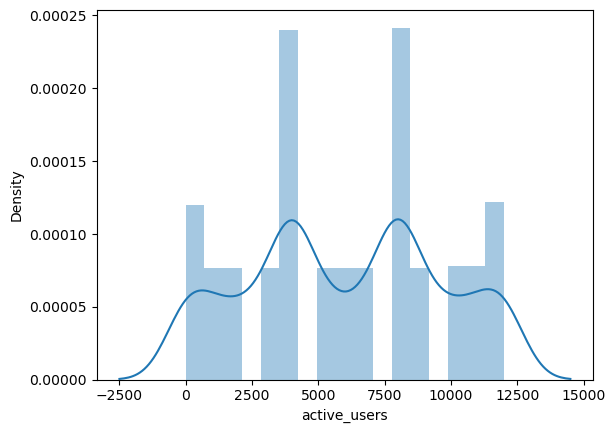

In [26]:
sns.distplot(dataset["active_users"])

## probability of desired range(mean and standard deviation)

In [27]:
def get_pdf_probability(balanced_data,startrange,endrange):
    from matplotlib import pyplot
    from scipy.stats import norm
    import seaborn as sns
    ax=sns.distplot(balanced_data,kde=True,kde_kws={'color':'blue'},color='Green')
    pyplot.axvline(startrange,color='Red')
    pyplot.axvline(endrange,color='Red')
    #generate a sample
    sample = balanced_data
    #calculate paramters
    sample_mean=sample.mean()
    sample_std=sample.std()
    print('Mean=%.3f, Standard Deviation=%.3f'%(sample_mean,sample_std))
    #define the distribution
    dist=norm(sample_mean,sample_std)
    #sample prbalities for a range of outcomes
    values=[value for value in range(startrange,endrange)]
    probabilities=[dist.pdf(value) for value in values]
    prob=sum(probabilities)
    print("The area between range({},{}):{}".format(startrange,endrange,sum(probabilities)))
    return prob

C:\Users\91934\AppData\Local\Temp\ipykernel_26680\2634122278.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(balanced_data,kde=True,kde_kws={'color':'blue'},color='Green')


Mean=6076.642, Standard Deviation=3676.106
The area between range(7500,10000):0.2063993746303273


0.2063993746303273

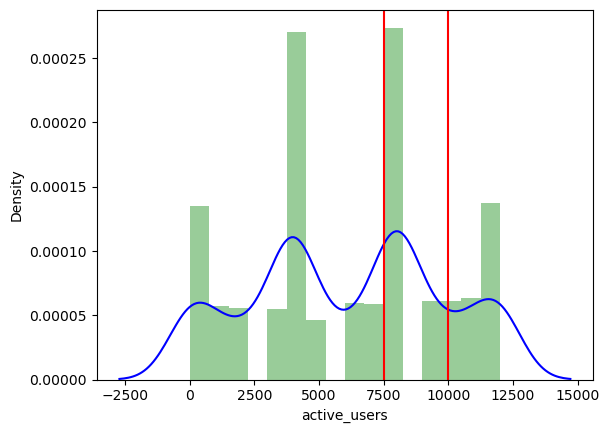

In [28]:
get_pdf_probability(balanced_data["active_users"],7500,10000)